In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import numpy as np
import time

In [2]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [3]:
scaler = MinMaxScaler()
datos = load_wine()
X = torch.tensor(scaler.fit_transform(datos.data), dtype=torch.float32)# con los datos tranformados

In [4]:
y = torch.tensor(LabelBinarizer().fit_transform(datos.target), dtype=torch.float32)# con binarizer

In [5]:
type(X), type(y), X.shape, y.shape

(torch.Tensor, torch.Tensor, torch.Size([178, 13]), torch.Size([178, 3]))

In [6]:
train_index, test_index = train_test_split(np.arange(datos.data.shape[0]), test_size=1/3, stratify=datos.target)
train_index.shape, test_index.shape#con arange

((118,), (60,))

In [7]:
class MLP(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(MLP,self).__init__()
        self.hidden_layer  = nn.Linear(input_dim,64)#oculta con la entrada
        self.output_layer  = nn.Linear(64,output_dim)#salida con la salida
        self.relu = nn.ReLU()#creo relu
    
    
    def forward(self,x):
        out =  self.relu(self.hidden_layer(x))#relu con la oculta
        out =  self.output_layer(out)#con de salida de si misma
        return out

In [8]:
model = MLP(input_dim=13, output_dim=3)

In [9]:
loss_fn = torch.nn.MSELoss()#loss de msel

In [10]:
optimizador = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)#optim del optimizador

In [11]:
aciertos_test = []
aciertos_train = []

In [12]:
for epochs in range(50):
    initial = time.time()
    for indx in train_index:
        optimizador.zero_grad()
        loss = loss_fn(model(X[indx]), y[indx])
        loss.backward()#loss para atras
        optimizador.step()#opti para delante
    final = time.time()
    #anado en cada uno los que sean igual
    aciertos_train.append((model(X[train_index]).argmax(axis=1) == y[train_index].argmax(axis=1)).numpy().mean())
    aciertos_test.append((model(X[test_index]).argmax(axis=1) == y[test_index].argmax(axis=1)).numpy().mean())
    print(f"{epochs}\t accuracy (train) = {aciertos_train[-1:]} \t\t (test) = {aciertos_test[-1:]} \t\t (elapsed) = {final - initial} seg.")

0	 accuracy (train) = [0.8559322033898306] 		 (test) = [0.8833333333333333] 		 (elapsed) = 0.04762530326843262 seg.
1	 accuracy (train) = [0.9661016949152542] 		 (test) = [0.9] 		 (elapsed) = 0.0529634952545166 seg.
2	 accuracy (train) = [0.9745762711864406] 		 (test) = [0.9166666666666666] 		 (elapsed) = 0.0379030704498291 seg.
3	 accuracy (train) = [0.9745762711864406] 		 (test) = [0.9333333333333333] 		 (elapsed) = 0.03918004035949707 seg.
4	 accuracy (train) = [0.9830508474576272] 		 (test) = [0.9333333333333333] 		 (elapsed) = 0.0444183349609375 seg.
5	 accuracy (train) = [0.9830508474576272] 		 (test) = [0.95] 		 (elapsed) = 0.062014102935791016 seg.
6	 accuracy (train) = [0.9915254237288136] 		 (test) = [0.95] 		 (elapsed) = 0.03920769691467285 seg.
7	 accuracy (train) = [0.9915254237288136] 		 (test) = [0.95] 		 (elapsed) = 0.04031491279602051 seg.
8	 accuracy (train) = [1.0] 		 (test) = [0.95] 		 (elapsed) = 0.04046750068664551 seg.
9	 accuracy (train) = [1.0] 		 (test) = [0.9

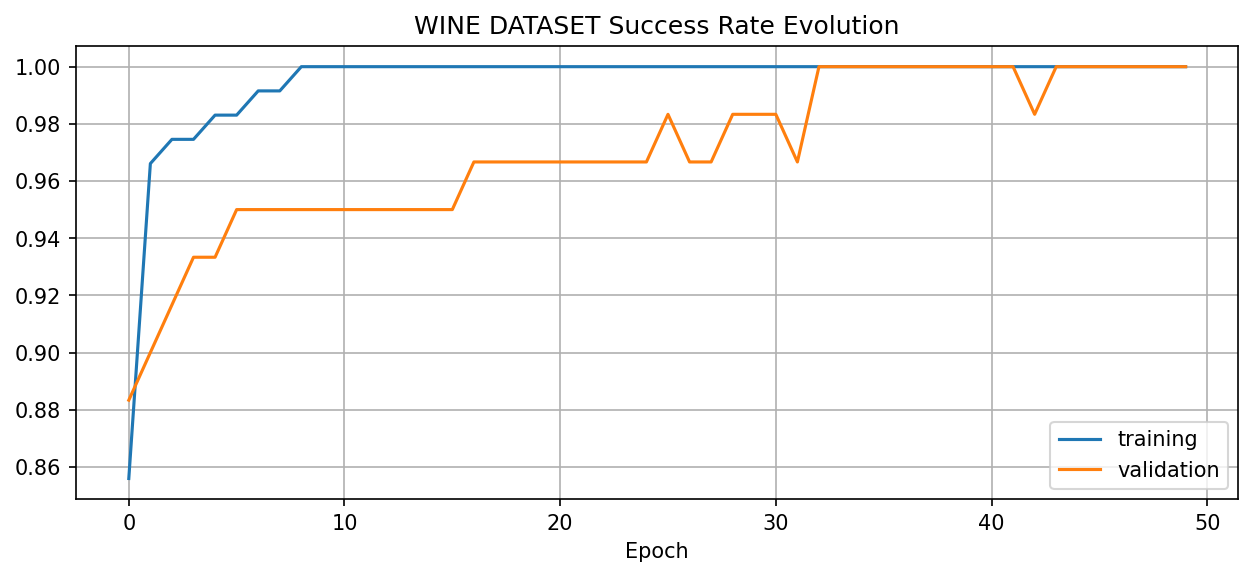

In [13]:
plt.figure(figsize=(10,4), dpi=150)
plt.plot(np.arange(len(aciertos_train), dtype=int), aciertos_train, label='training')
plt.plot(np.arange(len(aciertos_test), dtype=int), aciertos_test, label='validation')
plt.legend()
plt.title('WINE DATASET Success Rate Evolution')
plt.xlabel('Epoch')
# plt.xticks(history.epoch)
plt.grid()
plt.savefig("WINE MLP Pytorch.jpg", dpi=150)
plt.show()